In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

In [7]:
#Get the Data
#We'll use the pharming dataset dowloaded from Kaggle. We can get with the load function:
pharming = pd.read_csv('/home/showgologo/Documents/pharming.csv')

In [8]:
pharming.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [9]:
#Dropping the Domain column
domain_column = pharming.drop(['Index'], axis = 1).copy()

In [10]:
#checking the data for null or missing values
domain_column.isnull().sum()

UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
NonStdPort             0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
InfoEmail              0
AbnormalURL            0
WebsiteForwarding      0
StatusBarCust          0
DisableRightClick      0
UsingPopupWindow       0
IframeRedirection      0
AgeofDomain            0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
StatsReport            0
class                  0
dtype: int64

In [11]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
domain_column = domain_column.sample(frac=1).reset_index(drop=True)
domain_column.head()

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,-1,-1,1,1,1,1,1,1,-1,-1,...,-1,1,1,1,1,-1,1,1,1,1
1,1,-1,1,1,1,-1,-1,-1,1,1,...,1,1,1,1,0,-1,-1,0,1,-1
2,-1,-1,1,1,1,-1,-1,1,1,1,...,1,1,1,1,1,-1,1,1,1,1
3,1,-1,1,1,1,-1,-1,1,-1,1,...,1,1,1,-1,0,-1,1,0,1,-1
4,1,-1,1,-1,1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,0,1,1


In [12]:
# Sepratating & assigning features and target columns to X & y
y = domain_column['InfoEmail']  #target variable
X = domain_column.drop('InfoEmail',axis=1)   #independent variable

In [13]:
# Checking the shape for X, y variable 
X.shape, y.shape

((11054, 30), (11054,))

In [14]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)  #test-size 20%
X_train.shape, X_test.shape

((8843, 30), (2211, 30))

In [15]:
model = GaussianNB() 
model.fit(X_train,y_train)

GaussianNB()

In [16]:
y_pred = model.predict(X_test)
y_pred

array([ 1,  1,  1, ...,  1, -1, -1])

In [17]:
accuracy = accuracy_score(y_test,y_pred)*100 
accuracy

92.53731343283582

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred))
cm

Accuracy :  0.9253731343283582


array([[ 315,   91],
       [  74, 1731]])

In [19]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
5147,1,1
5708,1,1
2996,1,1
8380,1,1
8898,1,1
...,...,...
10419,1,1
9138,1,1
2326,1,1
82,-1,-1


In [23]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 315   91]
 [  74 1731]]

True Positives(TP) =  315

True Negatives(TN) =  1731

False Positives(FP) =  91

False Negatives(FN) =  74


<AxesSubplot:>

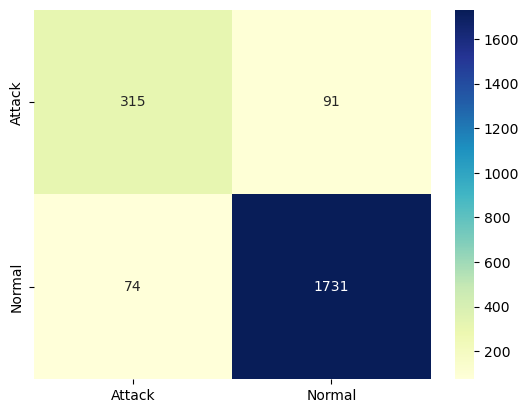

In [24]:
cm_matrix = pd.DataFrame(data=cm, columns=['Attack', 'Normal'], index=['Attack', 'Normal'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')